In [1]:
import pandas as pd
import numpy as np

from mcda.mcda_run import main
from mcda.utils import *
from mcda.configuration.config import Config
from mcda.utility_functions.normalization import Normalization
from mcda.utility_functions.aggregation import Aggregation

#### test with test df - uncomment

In [2]:
#polarities = ("+","-")

In [3]:
#d = {'col1': [1, 2, 3], 'col3': [100, 200, 300]}
#df = pd.DataFrame(data=d)
#df
#input_matrix = df

#### test with test example - uncomment

In [4]:
input_matrix = read_matrix("/Users/flaminia/Documents/work/MCDA/Examples/exp2_12_alternatives.csv")

/Users/flaminia/Documents/work/MCDTool/mcda/utils.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test = pd.read_csv(fp, sep="[,;:]", decimal='.')


In [5]:
imd = input_matrix.drop(input_matrix.columns[0],axis=1)

In [6]:
imd.head(3)

,productivity,timber amount,carbon storage,species suitability,biodiversity,disturbances,management cost,groundwater
0,6.577442,24.845319,107.507196,0.513059,1.0,2.0,3.0,160.369958
1,15.647698,224.026542,161.416472,0.547062,1.0,2.0,2.0,196.771264
2,8.996213,344.345764,176.419571,0.482547,1.0,3.0,2.0,187.386841


In [7]:
polarities = ("+","+","+","+","+","-","-","+")

In [8]:
weights = (0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833,0.0833)

## test normalization functions

In [9]:
norm = Normalization(imd, polarities)

#### minmax_01

In [10]:
scaled_minmax_01 = norm.minmax(feature_range=(0, 1))
scaled_minmax_01

,0,1,2,3,4,5,6,7
0,0.403506,0.060007,0.294457,0.592141,0.0,0.5,0.0,0.000000
1,1.000000,0.646012,0.727827,0.638796,0.0,0.5,1.0,0.438020
2,0.562574,1.000000,0.848436,0.550275,0.0,0.0,1.0,0.325096
3,0.051873,0.000000,0.174235,0.277905,0.0,0.5,1.0,0.456405
4,0.391955,0.216542,0.333791,0.241762,0.0,0.0,1.0,0.864244
5,0.000000,0.067382,0.000000,0.000000,0.0,0.0,1.0,0.617626
6,0.423869,0.126550,0.516781,0.886672,1.0,0.5,1.0,0.050011
7,0.409913,0.246300,0.685612,0.937092,1.0,0.5,0.0,0.496287
8,0.393471,0.578574,1.000000,1.000000,1.0,1.0,0.0,0.393672
9,0.342596,0.092918,0.457862,0.564497,1.0,1.0,1.0,0.472508


In [11]:
print(scaled_minmax_01.to_numpy().min())
print(scaled_minmax_01.to_numpy().max())

0.0
1.0000000000000002


#### minmax_no0

In [12]:
scaled_minmax_no0 = norm.minmax(feature_range=(0.1, 1))
scaled_minmax_no0

,0,1,2,3,4,5,6,7
0,0.463156,0.154007,0.365011,0.632927,0.1,0.55,0.1,0.100000
1,1.000000,0.681411,0.755045,0.674917,0.1,0.55,1.0,0.494218
2,0.606316,1.000000,0.863592,0.595248,0.1,0.10,1.0,0.392586
3,0.146686,0.100000,0.256812,0.350115,0.1,0.55,1.0,0.510765
4,0.452760,0.294888,0.400412,0.317585,0.1,0.10,1.0,0.877819
5,0.100000,0.160644,0.100000,0.100000,0.1,0.10,1.0,0.655863
6,0.481482,0.213895,0.565103,0.898005,1.0,0.55,1.0,0.145010
7,0.468922,0.321670,0.717050,0.943383,1.0,0.55,0.1,0.546658
8,0.454123,0.620716,1.000000,1.000000,1.0,1.00,0.1,0.454305
9,0.408337,0.183626,0.512076,0.608047,1.0,1.00,1.0,0.525258


In [13]:
print(scaled_minmax_no0.to_numpy().min())
print(scaled_minmax_no0.to_numpy().max())

0.09999999999999998
1.0


#### rank

In [14]:
scaled_rank = norm.rank()
scaled_rank

,0,1,2,3,4,5,6,7
0,8.0,2.0,3.0,7.0,3.5,6.0,3.0,1.0
1,12.0,11.0,9.0,8.0,3.5,6.0,9.0,5.0
2,11.0,12.0,10.0,5.0,3.5,2.0,9.0,3.0
3,2.0,1.0,2.0,3.0,3.5,6.0,9.0,6.0
4,6.0,7.0,4.0,2.0,3.5,2.0,9.0,11.0
5,1.0,3.0,1.0,1.0,3.5,2.0,9.0,10.0
6,10.0,5.0,6.0,10.0,9.5,6.0,9.0,2.0
7,9.0,8.0,8.0,11.0,9.5,6.0,3.0,8.0
8,7.0,10.0,12.0,12.0,9.5,10.5,3.0,4.0
9,5.0,4.0,5.0,6.0,9.5,10.5,9.0,7.0


In [15]:
print(scaled_rank.to_numpy().min())
print(scaled_rank.to_numpy().max())

1.0
12.0


#### standardized

In [16]:
scaled_stand_any = norm.standardized(feature_range=('-inf','+inf'))
scaled_stand_any

,0,1,2,3,4,5,6,7
0,0.091967,-0.811695,-0.830495,0.094594,-0.957427,-0.105091,-1.132843,-1.664553
1,2.467228,1.138266,0.598990,0.249410,-0.957427,-0.105091,0.809174,-0.135421
2,0.725379,2.316177,0.996819,-0.044327,-0.957427,-1.366187,0.809174,-0.529638
3,-1.308250,-1.011373,-1.227048,-0.948124,-0.957427,-0.105091,0.809174,-0.071237
4,0.045970,-0.290819,-0.700751,-1.068059,-0.957427,-1.366187,0.809174,1.352532
5,-1.514811,-0.787154,-1.801768,-1.870289,-0.957427,-1.366187,0.809174,0.491586
6,0.173052,-0.590272,-0.097151,1.071930,0.957427,-0.105091,0.809174,-1.489962
7,0.117479,-0.191796,0.459739,1.239237,0.957427,-0.105091,-1.132843,0.067992
8,0.052004,0.913860,1.496758,1.447981,0.957427,1.156004,-1.132843,-0.290239
9,-0.150580,-0.702183,-0.291499,0.002865,0.957427,1.156004,0.809174,-0.015020


In [17]:
print(scaled_stand_any.to_numpy().min())
print(scaled_stand_any.to_numpy().max())
print(scaled_stand_any.to_numpy().mean())
print(scaled_stand_any.to_numpy().std())

-1.8702885822299633
2.467227664076385
-2.1279274638648835e-16
0.9574271077563381


#### standardized no 0 - does not have mean 0 and std 1!

In [18]:
scaled_stand_no0 = norm.standardized(feature_range=(0.1,'+inf'))
scaled_stand_no0

,0,1,2,3,4,5,6,7
0,1.706779,0.299678,1.071273,2.064882,0.100000,1.361095,0.100000,0.100000
1,4.082039,2.249639,2.500757,2.219698,0.100000,1.361095,2.042017,1.629131
2,2.340191,3.427550,2.898587,1.925961,0.100000,0.100000,2.042017,1.234914
3,0.306561,0.100000,0.674720,1.022165,0.100000,1.361095,2.042017,1.693316
4,1.660781,0.820554,1.201017,0.902230,0.100000,0.100000,2.042017,3.117085
5,0.100000,0.324218,0.100000,0.100000,0.100000,0.100000,2.042017,2.256139
6,1.787863,0.521101,1.804617,3.042218,2.014854,1.361095,2.042017,0.274591
7,1.732290,0.919577,2.361507,3.209525,2.014854,1.361095,0.100000,1.832544
8,1.666815,2.025232,3.398526,3.418270,2.014854,2.622191,0.100000,1.474313
9,1.464231,0.409190,1.610269,1.973154,2.014854,2.622191,2.042017,1.749532


In [19]:
print(scaled_stand_no0.to_numpy().min())
print(scaled_stand_no0.to_numpy().max())
print(scaled_stand_no0.to_numpy().mean())
print(scaled_stand_no0.to_numpy().std())

0.1
4.082038963125437
1.514906186645644
1.0134552445816336


#### target

In [20]:
scaled_target = norm.target(feature_range=(0, 1))
scaled_target

,0,1,2,3,4,5,6,7
0,0.420346,0.072152,0.550547,0.633162,0.5,0.333333,0.000000,0.658673
1,1.000000,0.650586,0.826618,0.675125,0.5,0.333333,0.333333,0.808181
2,0.574922,1.000000,0.903449,0.595507,0.5,0.000000,0.333333,0.769637
3,0.078639,0.012920,0.473962,0.350532,0.5,0.333333,0.333333,0.814456
4,0.409121,0.226664,0.575604,0.318023,0.5,0.000000,0.333333,0.953663
5,0.028230,0.079432,0.362969,0.100577,0.5,0.000000,0.333333,0.869485
6,0.440133,0.137835,0.692175,0.898071,1.0,0.333333,0.333333,0.675743
7,0.426571,0.256038,0.799725,0.943419,1.0,0.333333,0.000000,0.828069
8,0.410593,0.584018,1.000000,1.000000,1.0,0.666667,0.000000,0.793044
9,0.361155,0.104638,0.654641,0.608299,1.0,0.666667,0.333333,0.819953


In [21]:
print(scaled_target.to_numpy().min())
print(scaled_target.to_numpy().max())

0.0
1.0


#### target no 0

In [22]:
scaled_target_no0 = norm.target(feature_range=(0.1, 1))

In [23]:
scaled_target_no0

,0,1,2,3,4,5,6,7
0,0.478311,0.164937,0.595492,0.669846,0.55,0.4,0.1,0.692806
1,1.000000,0.685527,0.843956,0.707613,0.55,0.4,0.4,0.827363
2,0.617430,1.000000,0.913104,0.635957,0.55,0.1,0.4,0.792673
3,0.170775,0.111628,0.526566,0.415479,0.55,0.4,0.4,0.833011
4,0.468209,0.303998,0.618043,0.386221,0.55,0.1,0.4,0.958296
5,0.125407,0.171489,0.426672,0.190520,0.55,0.1,0.4,0.882537
6,0.496120,0.224051,0.722957,0.908264,1.00,0.4,0.4,0.708169
7,0.483914,0.330434,0.819752,0.949077,1.00,0.4,0.1,0.845262
8,0.469534,0.625617,1.000000,1.000000,1.00,0.7,0.1,0.813740
9,0.425039,0.194174,0.689177,0.647469,1.00,0.7,0.4,0.837958


In [24]:
print(scaled_target_no0.to_numpy().min())
print(scaled_target_no0.to_numpy().max())

0.1
1.0


## test aggregation functions

In [25]:
agg = Aggregation(weights)

#### ws - standardized

In [26]:
scores_weighted_sum_standardized = agg.weighted_sum(scaled_stand_no0)
scores_weighted_sum_standardized.head(3)

[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
           0         1         2         3         4         5         6  \
0   1.706779  0.299678  1.071273  2.064882  0.100000  1.361095  0.100000   
1   4.082039  2.249639  2.500757  2.219698  0.100000  1.361095  2.042017   
2   2.340191  3.427550  2.898587  1.925961  0.100000  0.100000  2.042017   
3   0.306561  0.100000  0.674720  1.022165  0.100000  1.361095  2.042017   
4   1.660781  0.820554  1.201017  0.902230  0.100000  0.100000  2.042017   
5   0.100000  0.324218  0.100000  0.100000  0.100000  0.100000  2.042017   
6   1.787863  0.521101  1.804617  3.042218  2.014854  1.361095  2.042017   
7   1.732290  0.919577  2.361507  3.209525  2.014854  1.361095  0.100000   
8   1.666815  2.025232  3.398526  3.418270  2.014854  2.622191  0.100000   
9   1.464231  0.409190  1.610269  1.973154  2.014854  2.622191  2.042017   
10  1.432628  0.773304  2.288724  2.426952  2.014854  2.622191  0.100000   
11  1.097557  1.466430  2.91121

0    0.850463
1    2.023047
2    1.758652
dtype: float64

In [27]:
print(scores_weighted_sum_standardized.to_numpy().min())
print(scores_weighted_sum_standardized.to_numpy().max())

0.6402967161868066
2.090025141676184


#### ws - target

In [28]:
scores_weighted_sum_target = agg.weighted_sum(scaled_target)
scores_weighted_sum_target.head(3)

[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
           0         1         2         3    4         5         6         7
0   0.420346  0.072152  0.550547  0.633162  0.5  0.333333  0.000000  0.658673
1   1.000000  0.650586  0.826618  0.675125  0.5  0.333333  0.333333  0.808181
2   0.574922  1.000000  0.903449  0.595507  0.5  0.000000  0.333333  0.769637
3   0.078639  0.012920  0.473962  0.350532  0.5  0.333333  0.333333  0.814456
4   0.409121  0.226664  0.575604  0.318023  0.5  0.000000  0.333333  0.953663
5   0.028230  0.079432  0.362969  0.100577  0.5  0.000000  0.333333  0.869485
6   0.440133  0.137835  0.692175  0.898071  1.0  0.333333  0.333333  0.675743
7   0.426571  0.256038  0.799725  0.943419  1.0  0.333333  0.000000  0.828069
8   0.410593  0.584018  1.000000  1.000000  1.0  0.666667  0.000000  0.793044
9   0.361155  0.104638  0.654641  0.608299  1.0  0.666667  0.333333  0.819953
10  0.353442  0.212648  0.785668  0.731302  1.0  0.666667  0.000000  1.000000
11  0.2

0    0.396027
1    0.640897
2    0.584606
dtype: float64

In [29]:
print(scores_weighted_sum_target.to_numpy().min())
print(scores_weighted_sum_target.to_numpy().max())

0.28425340308299735
0.681790264936132


#### ws - rank

In [30]:
scores_weighted_sum_rank = agg.weighted_sum(scaled_rank)
scores_weighted_sum_rank.head(3)

[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
       0     1     2     3    4     5    6     7
0    8.0   2.0   3.0   7.0  3.5   6.0  3.0   1.0
1   12.0  11.0   9.0   8.0  3.5   6.0  9.0   5.0
2   11.0  12.0  10.0   5.0  3.5   2.0  9.0   3.0
3    2.0   1.0   2.0   3.0  3.5   6.0  9.0   6.0
4    6.0   7.0   4.0   2.0  3.5   2.0  9.0  11.0
5    1.0   3.0   1.0   1.0  3.5   2.0  9.0  10.0
6   10.0   5.0   6.0  10.0  9.5   6.0  9.0   2.0
7    9.0   8.0   8.0  11.0  9.5   6.0  3.0   8.0
8    7.0  10.0  12.0  12.0  9.5  10.5  3.0   4.0
9    5.0   4.0   5.0   6.0  9.5  10.5  9.0   7.0
10   4.0   6.0   7.0   9.0  9.5  10.5  3.0  12.0
11   3.0   9.0  11.0   4.0  9.5  10.5  3.0   9.0


0    4.1875
1    7.9375
2    6.9375
dtype: float64

In [31]:
print(scores_weighted_sum_rank.to_numpy().min())
print(scores_weighted_sum_rank.to_numpy().max())

3.8125
8.5


#### ws -minmax

In [32]:
scores_weighted_sum_minmax = agg.weighted_sum(scaled_minmax_01)
scores_weighted_sum_minmax.head(3)

[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
           0         1         2         3    4    5    6         7
0   0.403506  0.060007  0.294457  0.592141  0.0  0.5  0.0  0.000000
1   1.000000  0.646012  0.727827  0.638796  0.0  0.5  1.0  0.438020
2   0.562574  1.000000  0.848436  0.550275  0.0  0.0  1.0  0.325096
3   0.051873  0.000000  0.174235  0.277905  0.0  0.5  1.0  0.456405
4   0.391955  0.216542  0.333791  0.241762  0.0  0.0  1.0  0.864244
5   0.000000  0.067382  0.000000  0.000000  0.0  0.0  1.0  0.617626
6   0.423869  0.126550  0.516781  0.886672  1.0  0.5  1.0  0.050011
7   0.409913  0.246300  0.685612  0.937092  1.0  0.5  0.0  0.496287
8   0.393471  0.578574  1.000000  1.000000  1.0  1.0  0.0  0.393672
9   0.342596  0.092918  0.457862  0.564497  1.0  1.0  1.0  0.472508
10  0.334660  0.202342  0.663546  0.701255  1.0  1.0  0.0  1.000000
11  0.250514  0.410641  0.852265  0.373209  1.0  1.0  0.0  0.607862


0    0.231264
1    0.618832
2    0.535798
dtype: float64

In [33]:
print(scores_weighted_sum_minmax.to_numpy().min())
print(scores_weighted_sum_minmax.to_numpy().max())

0.2106260187790405
0.6707145049121476


#### geom - stand

In [34]:
scores_geom_standardized = agg.geometric(scaled_stand_no0)
scores_geom_standardized.head(3)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [35]:
print(scores_geom_standardized.to_numpy().min())
print(scores_geom_standardized.to_numpy().max())

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

#### harm - rank

In [36]:
scaled_rank

,0,1,2,3,4,5,6,7
0,8.0,2.0,3.0,7.0,3.5,6.0,3.0,1.0
1,12.0,11.0,9.0,8.0,3.5,6.0,9.0,5.0
2,11.0,12.0,10.0,5.0,3.5,2.0,9.0,3.0
3,2.0,1.0,2.0,3.0,3.5,6.0,9.0,6.0
4,6.0,7.0,4.0,2.0,3.5,2.0,9.0,11.0
5,1.0,3.0,1.0,1.0,3.5,2.0,9.0,10.0
6,10.0,5.0,6.0,10.0,9.5,6.0,9.0,2.0
7,9.0,8.0,8.0,11.0,9.5,6.0,3.0,8.0
8,7.0,10.0,12.0,12.0,9.5,10.5,3.0,4.0
9,5.0,4.0,5.0,6.0,9.5,10.5,9.0,7.0


In [37]:
scores_harm_rank = agg.harmonic(scaled_rank)
scores_harm_rank

array([2.77113402, 6.81520637, 4.69373069, 2.61139896, 3.9076652 ,
       1.84750733, 5.51835418, 6.76656737, 6.70376982, 6.2935822 ,
       6.21213104, 5.59323519])

In [38]:
print(scores_harm_rank.to_numpy().min())
print(scores_harm_rank.to_numpy().max())

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [39]:
np.asarray(weights)

array([0.0833, 0.0833, 0.0833, 0.0833, 0.0833, 0.0833, 0.0833, 0.0833])

In [40]:
from scipy import stats
scores = stats.hmean(scaled_rank, axis=1, weights=[0.0833, 0.0833, 0.0833, 0.0833, 0.0833, 0.0833, 0.0833, 0.0833])

In [41]:
scores

array([2.77113402, 6.81520637, 4.69373069, 2.61139896, 3.9076652 ,
       1.84750733, 5.51835418, 6.76656737, 6.70376982, 6.2935822 ,
       6.21213104, 5.59323519])

#### harm -minmax

In [42]:
scores_harm_minmax = agg.harmonic(scaled_minmax_no0)
scores_harm_minmax.head(3)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [43]:
print(scores_harm_minmax.to_numpy().min())
print(scores_harm_minmax.to_numpy().max())

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

#### test

In [44]:
d = {'col1': [2, 4, 8], 'col2': [4, 2, 4], 'col3': [8, 8, 2]}
df = pd.DataFrame(data=d)
df

,col1,col2,col3
0,2,4,8
1,4,2,8
2,8,4,2


In [45]:
w = (0.83,0.83,0.83)
w = [val/sum(w) for val in w]
print(w)
agg = Aggregation(w)

[0.33333333333333337, 0.33333333333333337, 0.33333333333333337]


In [46]:
test_harmonic = agg.harmonic(df)

In [47]:
test_harmonic

array([3.42857143, 3.42857143, 3.42857143])

In [48]:
scores = 3/((w/df).sum(axis=1))

In [49]:
scores

0    10.285714
1    10.285714
2    10.285714
dtype: float64

In [50]:
1/df

,col1,col2,col3
0,0.500,0.25,0.125
1,0.250,0.50,0.125
2,0.125,0.25,0.500


In [51]:
((w/df).sum(axis=1))

0    0.291667
1    0.291667
2    0.291667
dtype: float64

In [52]:
0.166667+0.083333+0.041667

0.291667

In [53]:
3/0.291667

10.285702530625679

In [54]:
! pip freeze

affine==2.3.0
anyio==3.6.2
appnope==0.1.2
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arrow==1.2.3
async-generator==1.10
attrs==21.2.0
backcall==0.2.0
basemap==1.3.6
basemap-data==1.3.2
beautifulsoup4 @ file:///home/conda/feedstock_root/build_artifacts/beautifulsoup4_1649463573192/work
bleach==5.0.1
blis @ file:///Users/runner/miniforge3/conda-bld/cython-blis_1668499380737/work
Bottleneck @ file:///Users/runner/miniforge3/conda-bld/bottleneck_1666839229396/work
boxsdk==3.1.0
brotlipy==0.7.0
catalogue @ file:///Users/runner/miniforge3/conda-bld/catalogue_1666892118051/work
certifi==2022.12.7
cffi @ file:///Users/runner/miniforge3/conda-bld/cffi_1625835350093/work
chardet==3.0.4
charset-normalizer @ file:///home/conda/feedstock_root/build_artifacts/charset-normalizer_1626371162869/work
click==8.0.3
click-plugins==1.1.1
cligj==0.7.2
colorama @ file:///home/conda/feedstock_root/build_artifacts/colorama_1602866480661/work
comm==0.1.2
conda==4.10.3
conda-package-handling @ file:///Users

In [55]:
! pip install scipy --upgrade 

In [56]:
test = (-0.8746094704588377, 0.2106260187790405, 0.28425340308299735, 3.8125, 0.24933476179485964,
        0.178992476386785, 0.2762762052039914, 2.5677794893476786, 0.14810073274476654, 0.13617103272451786, 
        0.21710160012362398, 1.8475073313782997, -1.8702885822299633)

In [57]:
x = pd.Series(test)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x.to_numpy().reshape(1, -1))
#normalized_scores = pd.DataFrame(x_scaled)
#normalized_scores.columns = scores.columns

In [58]:
x_scaled

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [59]:
mat = ([0.312364069620889, 0.572682522547028, 0.620758070630362, 0.284353233876634,0.373314401059457,0.227338359110367,
       0.637996861947329,0.485862240805223,0.437484071882582,0.29521571388874,0.356620159424411])

DEBUG: 2023-05-31 15:55:22,997 - matplotlib - matplotlib data path: /Users/flaminia/mambaforge/lib/python3.9/site-packages/matplotlib/mpl-data
DEBUG: 2023-05-31 15:55:23,000 - matplotlib - CONFIGDIR=/Users/flaminia/.matplotlib
DEBUG: 2023-05-31 15:55:23,002 - matplotlib - interactive is False
DEBUG: 2023-05-31 15:55:23,003 - matplotlib - platform is darwin
DEBUG: 2023-05-31 15:55:23,038 - matplotlib - CACHEDIR=/Users/flaminia/.matplotlib
DEBUG: 2023-05-31 15:55:23,040 - matplotlib.font_manager - Using fontManager instance from /Users/flaminia/.matplotlib/fontlist-v330.json
DEBUG: 2023-05-31 15:55:23,168 - matplotlib.pyplot - Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG: 2023-05-31 15:55:23,169 - matplotlib.pyplot - Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG: 2023-05-31 15:55:23,170 - matplotlib.font_manager - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG: 2

DEBUG: 2023-05-31 15:55:23,176 - matplotlib.font_manager - findfont: score(FontEntry(fname='/Users/flaminia/mambaforge/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: 2023-05-31 15:55:23,176 - matplotlib.font_manager - findfont: score(FontEntry(fname='/Users/flaminia/mambaforge/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: 2023-05-31 15:55:23,176 - matplotlib.font_manager - findfont: score(FontEntry(fname='/Users/flaminia/mambaforge/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
DEBUG: 2023-05-31 15:55:23,176 - matplotlib.font_manager - findfont: score(

DEBUG: 2023-05-31 15:55:23,186 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Bangla MN.ttc', name='Bangla MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: 2023-05-31 15:55:23,187 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOldHungarian-Regular.ttf', name='Noto Sans Old Hungarian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: 2023-05-31 15:55:23,187 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Futura.ttc', name='Futura', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG: 2023-05-31 15:55:23,187 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Palatino.ttc', name='Palatino', style='normal', variant='normal', weight=400, stretch='normal', size='sca

DEBUG: 2023-05-31 15:55:23,201 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansOgham-Regular.ttf', name='Noto Sans Ogham', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: 2023-05-31 15:55:23,202 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Ayuthaya.ttf', name='Ayuthaya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: 2023-05-31 15:55:23,202 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLepcha-Regular.ttf', name='Noto Sans Lepcha', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: 2023-05-31 15:55:23,202 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXNonUniIta.otf', name='STIXNonUnicode', style='italic', variant='normal', weight=

DEBUG: 2023-05-31 15:55:23,214 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/AppleMyungjo.ttf', name='AppleMyungjo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: 2023-05-31 15:55:23,215 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Times.ttc', name='Times', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: 2023-05-31 15:55:23,215 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/ZapfDingbats.ttf', name='Zapf Dingbats', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: 2023-05-31 15:55:23,215 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/MuktaMahee.ttc', name='Mukta Mahee', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: 2023-05-31 15:55:23,

DEBUG: 2023-05-31 15:55:23,225 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Hoefler Text.ttc', name='Hoefler Text', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: 2023-05-31 15:55:23,225 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial Italic.ttf', name='Arial', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 7.413636363636363
DEBUG: 2023-05-31 15:55:23,225 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBol.otf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG: 2023-05-31 15:55:23,225 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Skia.ttf', name='Skia', style='normal', variant='normal', weight=5, stretch='normal', size='sca

DEBUG: 2023-05-31 15:55:23,237 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Lao Sangam MN.ttf', name='Lao Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: 2023-05-31 15:55:23,237 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Khmer Sangam MN.ttf', name='Khmer Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: 2023-05-31 15:55:23,237 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Trattatello.ttf', name='Trattatello', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: 2023-05-31 15:55:23,238 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Baskerville.ttc', name='Baskerville', style='normal', variant='normal', weight=400, stretch='nor

DEBUG: 2023-05-31 15:55:23,244 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Impact.ttf', name='Impact', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: 2023-05-31 15:55:23,244 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansBuhid-Regular.ttf', name='Noto Sans Buhid', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: 2023-05-31 15:55:23,244 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/KufiStandardGK.ttc', name='KufiStandardGK', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: 2023-05-31 15:55:23,244 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Arial.ttf', name='Arial', style='normal', variant='normal', weight=400, stretch='normal', size='sc

DEBUG: 2023-05-31 15:55:23,252 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Songti.ttc', name='Songti SC', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
DEBUG: 2023-05-31 15:55:23,252 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Cochin.ttc', name='Cochin', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG: 2023-05-31 15:55:23,252 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMeroitic-Regular.ttf', name='Noto Sans Meroitic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: 2023-05-31 15:55:23,253 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Oriya Sangam MN.ttc', name='Oriya Sangam MN', style='normal', variant='normal', weight=400, stretch='no

DEBUG: 2023-05-31 15:55:23,260 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSamaritan-Regular.ttf', name='Noto Sans Samaritan', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: 2023-05-31 15:55:23,260 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Times New Roman Bold.ttf', name='Times New Roman', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG: 2023-05-31 15:55:23,260 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/BigCaslon.ttf', name='Big Caslon', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG: 2023-05-31 15:55:23,260 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPhoenician-Regular.ttf', name='Noto Sans Phoenician', style='norma

DEBUG: 2023-05-31 15:55:23,268 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansLycian-Regular.ttf', name='Noto Sans Lycian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: 2023-05-31 15:55:23,269 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Kailasa.ttc', name='Kailasa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: 2023-05-31 15:55:23,269 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansHanifiRohingya-Regular.ttf', name='Noto Sans Hanifi Rohingya', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: 2023-05-31 15:55:23,269 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansPauCinHau-Regular.ttf', name='Noto Sans Pau Cin Hau', style

DEBUG: 2023-05-31 15:55:23,276 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/LucidaGrande.ttc', name='Lucida Grande', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 2.872272727272727
DEBUG: 2023-05-31 15:55:23,276 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansSundanese-Regular.ttf', name='Noto Sans Sundanese', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: 2023-05-31 15:55:23,277 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi MN.ttc', name='Gurmukhi MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: 2023-05-31 15:55:23,277 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBolIta.otf', name='STIXGeneral', style='italic', variant='normal', weight

DEBUG: 2023-05-31 15:55:23,287 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansManichaean-Regular.ttf', name='Noto Sans Manichaean', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: 2023-05-31 15:55:23,287 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Gurmukhi Sangam MN.ttc', name='Gurmukhi Sangam MN', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG: 2023-05-31 15:55:23,288 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSMonoItalic.ttf', name='.SF NS Mono', style='italic', variant='normal', weight=295, stretch='normal', size='scalable')) = 11.14975
DEBUG: 2023-05-31 15:55:23,288 - matplotlib.font_manager - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXIntDReg.otf', name='STIXIntegralsD', style='normal', variant='normal', we

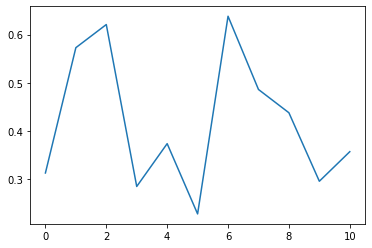

In [60]:
from matplotlib import pyplot as plt
plt.plot(mat)

In [61]:
fla = ([0.23424000701222478,0.558295487610803,0.43246913946612614,0.27931847722269404,0.3324008255307545,0.178992476386785,
        0.5040731590992106,0.4851248245855748,0.5799983921809404,0.5768655710298186,0.5249760255282884,0.49724686626336706])

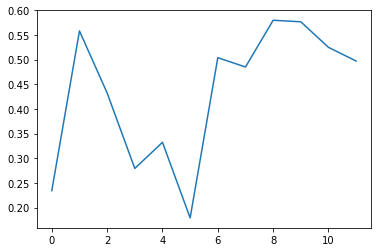

In [62]:
plt.plot(fla)

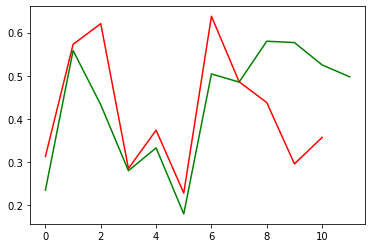

In [63]:
plt.plot(mat, color='r', label='mat')
plt.plot(fla, color='g', label='fla')

In [64]:
0.12*8

0.96